In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
from networkx.generators.classic import star_graph
import numpy as np
import random

import scipy.stats as stats
from scipy.optimize import curve_fit


import time
import os

In [19]:
@py_random_state(2)
def barabasi_albert(n, m, seed=None, initial_graph=None):
    """Returns a random graph using Barabási–Albert preferential attachment

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    initial_graph : Graph or None (default)
        Initial network for Barabási–Albert algorithm.
        It should be a connected graph for most use cases.
        A copy of `initial_graph` is used.
        If None, starts from a star graph on (m+1) nodes.

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``, or
        the initial graph number of nodes m0 does not satisfy ``m <= m0 <= n``.

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    if initial_graph is None:
        # Default initial graph : star graph on (m + 1) nodes
        G = star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Barabási–Albert initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    # Start adding the other n - m0 nodes.
    source = len(G)
    while source < n:
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)

        source += 1
    return G

In [20]:
time_steps = int(1e5) 
# t0 = time.time()

explorations_per_graph=2

def LinearSearch(lys, element):
    for i in range(len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G, explorations_per_graph):
    seed = np.random.RandomState()

    initial_node = _random_subset(G.nodes, 1, seed).pop()
       
    #dinamica di esplorazione: semplicemente riempio una lista dei nuovi nodi in cui va il walker. Linear search 
    #mi guarda se il nodo è gia presente e non lo aggiunge. Exploration fa un evoluzione temporale restituendo il nuovo nodo
    
    def exploration(initial_node, G, explored_nodes):
        if LinearSearch(explored_nodes, initial_node) < 0:
            explored_nodes += [initial_node]
        neighbours = list(G[initial_node])
        new_node = _random_subset(neighbours, 1, seed).pop()
        return new_node

    exploration_time = []
    explored_nodes = []

    #ripeto l'esplorazione di "time_steps" passi temporali "exploration_per_graph" volte per fare una media - i tempi 
    #di esplorazione variano molto di volta in volta. Semplicemente ogni iterazione mi cambia il nodo iniziale con quello
    #nuovo chiamando la funzione esplorazione. Quando tutti i nodi sono esplorati salvo il tempo impiegato e svuoto il vettore
    #Infine faccio una media dei tempi.
    
    for i in range(explorations_per_graph):
        t = 0
        while True:
            initial_node = exploration(initial_node, G, explored_nodes)

            if len(explored_nodes) == len(G.nodes):
#                 print(np.sort(explored_nodes))
                exploration_time += [t]
                explored_nodes.clear()
#                 print(np.sort(explored_nodes))
                break
            t += 1

    mean_exploration_time = sum(exploration_time)/explorations_per_graph
    print("mean_exploration_time: ", mean_exploration_time, "for", len(G.nodes) ,"nodes")

    return mean_exploration_time
    
#print(exploration_time)
#print(explored_nodes) 
#print(len(explored_nodes),"Explored nodes")
     

# print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

Exploration for random graph

in funzione del numero di nodi t(N)

In [16]:
N = [20+i*200 for i in range(20)] # vettore dei nodi dei diversi grafi
P = 0.25
Times = []

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G, explorations_per_graph)]  


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
mean_exploration_time:  69.5 for 20 nodes
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 20

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

[   0    1    2 ... 3617 3618 3619]
[   0    1    2 ... 3617 3618 3619]
mean_exploration_time:  26621.5 for 3620 nodes
[   0    1    2 ... 3817 3818 3819]
[   0    1    2 ... 3817 3818 3819]
mean_exploration_time:  33662.5 for 3820 nodes


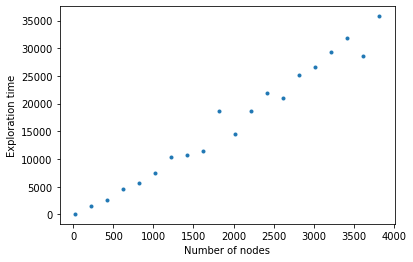

[    9.15147744 -1241.98669173]


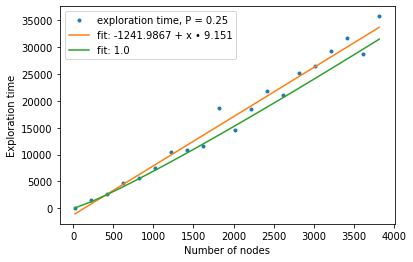

In [15]:
fig, ax = plt.subplots()

ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

def log_law(x):
    return x*np.log(x)

# popt, pcov = curve_fit(log_law, N, Times) 

fit_function = log_law([])

linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = f"exploration time, P = {P}")
ax.set_xlabel("Number of nodes")
ax.set_ylabel(f"Exploration time")

ax.plot(N, fit, '-', label = f"fit: {round(linear_fit[1],4)} + x • {round(linear_fit[0],3)}")
ax.plot(N, fit_function, '-', label = f"fit: {round(popt[0],4)}")

ax.legend()

plt.show()


in funzione di P t(P)

Exploration for scale-free graph

in funzione del numero di nodi t(N)

In [23]:
N = [20+i*200 for i in range(40)]
M = 4
Times = []

G = nx.complete_graph(M)

for i in range(len(N)):
    G = barabasi_albert(N[i], M, initial_graph = G)
    Times += [time_nodes(G,explorations_per_graph)]  

mean_exploration_time:  89.0 for 20 nodes
mean_exploration_time:  2239.5 for 220 nodes
mean_exploration_time:  5165.0 for 420 nodes
mean_exploration_time:  7282.0 for 620 nodes
mean_exploration_time:  11014.5 for 820 nodes
mean_exploration_time:  14950.5 for 1020 nodes
mean_exploration_time:  17740.5 for 1220 nodes
mean_exploration_time:  17970.5 for 1420 nodes
mean_exploration_time:  26826.0 for 1620 nodes
mean_exploration_time:  23997.5 for 1820 nodes
mean_exploration_time:  42152.0 for 2020 nodes
mean_exploration_time:  40331.5 for 2220 nodes
mean_exploration_time:  36954.0 for 2420 nodes
mean_exploration_time:  49574.5 for 2620 nodes
mean_exploration_time:  40189.5 for 2820 nodes
mean_exploration_time:  45990.5 for 3020 nodes
mean_exploration_time:  54854.5 for 3220 nodes
mean_exploration_time:  59307.5 for 3420 nodes
mean_exploration_time:  56268.0 for 3620 nodes
mean_exploration_time:  60481.0 for 3820 nodes
mean_exploration_time:  72363.0 for 4020 nodes
mean_exploration_time:  7

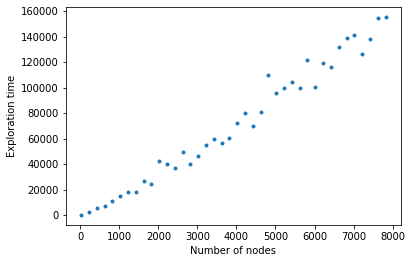

[-9.59918220e-08  1.57301141e-03  1.31039401e+01 -4.15283485e+02]


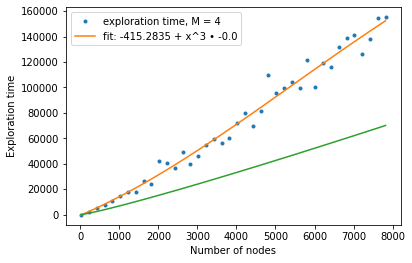

In [35]:
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

def log_law(x):
    return x*np.log(x)

# popt, pcov = curve_fit(log_law, N, Times) 

fit_function = log_law(N)

linear_fit=np.polyfit(N,Times,3)

print(linear_fit)

fit = [linear_fit[0]*n**3+linear_fit[1]*n**2+linear_fit[2]*n+linear_fit[3] for n in N]

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = f"exploration time, M = {M}")
ax.set_xlabel("Number of nodes")
ax.set_ylabel(f"Exploration time")

ax.plot(N, fit, '-', label = f"fit: {round(linear_fit[3],4)} + x^3 • {round(linear_fit[0],3)}")
# ax.plot(N, [n**2for n in N],  '-', label = "x^3")
ax.plot(N, fit_function, '-', 
# #         label = f"fit: {round(linear_fit[1],4)} + x • {round(linear_fit[0],3)}"
       )

ax.legend()
plt.show()

in funzione di M - t(M)